_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Parking Availability</div>

<div class="usecase-authors"><b>Authored by: </b> Angie Hollingworth, Siju Deng</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

### new

In [1]:
import os
API_KEY = os.environ.get('MELBOURNE_API_KEY', input("Please enter your API key: "))

Please enter your API key:  558000cd83c1d1ba8c4a5e09e0063424750542b70b132293e63b645a


In [2]:
import requests
import pandas as pd

# Fetch parking data from API
def fetch_parking_data(base_url, dataset, api_key, num_records=100):
    all_records = []
    offset = 0
    while True:
        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&{api_key}'
        try:
            result = requests.get(url, timeout=10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f"API request failed: {e}")

        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break
        offset += num_records

    df = pd.DataFrame(all_records)
    return df

# Read API key from environment variable
API_KEY = os.environ.get('MELBOURNE_API_KEY', 'Your_Default_API_Key')

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
SENSOR_DATASET = 'on-street-parking-bay-sensors'

df = fetch_parking_data(BASE_URL, SENSOR_DATASET, API_KEY)

# Extract latitude and longitude
df['location_lat'] = df['location'].apply(lambda x: x.get('lat', None))
df['location_lon'] = df['location'].apply(lambda x: x.get('lon', None))

# Drop the original location column
df.drop(columns=['location'], inplace=True)

# Display the DataFrame
print(df.head())


                 lastupdated           status_timestamp  zone_number  \
0  2023-07-20T05:44:36+00:00  2023-07-19T21:24:38+00:00       7358.0   
1  2023-07-20T05:44:36+00:00  2023-07-20T05:23:46+00:00       7358.0   
2  2023-07-20T05:44:36+00:00  2023-07-20T04:46:01+00:00       7358.0   
3  2023-07-24T06:44:36+00:00  2023-07-24T06:16:08+00:00       7638.0   
4  2023-07-24T06:44:36+00:00  2023-07-24T05:50:20+00:00       7638.0   

  status_description  parkingbay_id  location_lat  location_lon  
0         Unoccupied           7075    -37.814591    144.969350  
1            Present           7076    -37.814569    144.969424  
2         Unoccupied           7077    -37.814547    144.969500  
3         Unoccupied           5852    -37.813205    144.968283  
4         Unoccupied           5874    -37.813361    144.968354  


In [3]:
df

lastupdated           status_timestamp  zone_number  \
0     2023-07-20T05:44:36+00:00  2023-07-19T21:24:38+00:00       7358.0   
1     2023-07-20T05:44:36+00:00  2023-07-20T05:23:46+00:00       7358.0   
2     2023-07-20T05:44:36+00:00  2023-07-20T04:46:01+00:00       7358.0   
3     2023-07-24T06:44:36+00:00  2023-07-24T06:16:08+00:00       7638.0   
4     2023-07-24T06:44:36+00:00  2023-07-24T05:50:20+00:00       7638.0   
...                         ...                        ...          ...   
5172  2023-09-05T09:42:36+00:00  2023-09-05T08:47:23+00:00       7413.0   
5173  2023-09-05T09:42:36+00:00  2023-09-05T08:40:42+00:00       7320.0   
5174  2023-09-05T09:42:36+00:00  2023-09-05T08:26:36+00:00       7320.0   
5175  2023-09-05T09:42:36+00:00  2022-12-10T13:00:11+00:00       7501.0   
5176  2023-09-05T09:42:36+00:00  2023-02-08T20:27:26+00:00       7502.0   

     status_description  parkingbay_id  location_lat  location_lon  
0            Unoccupied           7075    -37.814591    144.969350  
1               Present           7076    -37.814569    144.969424  
2            Unoccupied           7077    -37.814547    144.969500  
3            Unoccupied           5852    -37.813205    144.968283  
4            Unoccupied           5874    -37.813361    144.968354  
...                 ...            ...           ...           ...  
5172            Present          51013    -37.812758    144.970963  
5173            Present          63554    -37.812530    144.969320  
5174            Present          63553    -37.812511    144.969384  
5175            Present          15256    -37.809153    144.965581  
5176         Unoccupied          15259    -37.809096    144.965772  

[5177 rows x 7 columns]

### old

In [ ]:
# import pandas as pd
# from sodapy import Socrata

# # find the parking dataset @ https://data.melbourne.vic.gov.au/Transport/On-street-Parking-Bay-Sensors/vh2v-4nfs
# parking_dataset_id = 'vh2v-4nfs'
# # app tokens are just used to manage throttling (not authentication)
# app_token = '[your app token]' #find out about app tokens @ https://dev.socrata.com/docs/app-tokens.html
# bucket = 'opendataplayground.deakin'

# # Access open data through Socrata client
# client = Socrata(
#     "data.melbourne.vic.gov.au",
#     app_token,
#     timeout=120
# )

# # read snapshot of parking sensors status
# api_results = client.get_all(parking_dataset_id)
# parking_sensors = pd.DataFrame.from_dict(api_results)
# parking_sensors = parking_sensors.astype({'lat':'float64', 'lon':'float64'})
# # remove duplicates found in the parking sensor data
# parking_sensors = parking_sensors.drop_duplicates()
# parking_sensors[['lat', 'lon', 'status']].to_json('./latest_parking_sensors.json')


#### Function to get full dataset

### new

In [4]:
def validate_data(df):
    print("\nChecking for NaN values:")
    print(df.isna().sum())
    print("\nChecking for Duplicates:")
    print(df.duplicated().sum())
    print("\nChecking data types:")
    print(df.dtypes)

validate_data(df)


Checking for NaN values:
lastupdated             0
status_timestamp        0
zone_number           399
status_description      0
parkingbay_id           0
location_lat            0
location_lon            0
dtype: int64

Checking for Duplicates:
0

Checking data types:
lastupdated            object
status_timestamp       object
zone_number           float64
status_description     object
parkingbay_id           int64
location_lat          float64
location_lon          float64
dtype: object


In [5]:
# Create a new DataFrame for analysis based on the original df
df_analysis = df.copy()

# Convert 'lastupdated' and 'status_timestamp' to datetime objects
df_analysis['lastupdated'] = pd.to_datetime(df_analysis['lastupdated'])
df_analysis['status_timestamp'] = pd.to_datetime(df_analysis['status_timestamp'])

# Identify the most recent timestamp
latest_timestamp = df_analysis['status_timestamp'].max()

# Calculate the date one year ago from the most recent timestamp
one_year_ago = latest_timestamp - pd.DateOffset(years=1)

# Identify rows with 'status_timestamp' older than one year
outdated_rows = df_analysis[df_analysis['status_timestamp'] < one_year_ago].copy()

# Print these outdated rows, sorted by 'status_timestamp'
print("Outdated rows:")
print(outdated_rows.sort_values(by='status_timestamp').head())

# Print the data header sorted by 'status_timestamp'
print("\nData header sorted by time:")
print(df_analysis.sort_values(by='status_timestamp').head())

# Delete outdated rows
df_analysis = df_analysis[df_analysis['status_timestamp'] >= one_year_ago]


Outdated rows:
                   lastupdated          status_timestamp  zone_number  \
4591 2023-09-05 09:42:36+00:00 1970-01-01 00:00:00+00:00       7112.0   
3215 2023-09-05 09:42:36+00:00 2022-07-27 23:03:14+00:00       7062.0   
4999 2023-09-05 09:42:36+00:00 2022-08-02 08:41:19+00:00          NaN   

     status_description  parkingbay_id  location_lat  location_lon  
4591         Unoccupied          23650    -37.801596    144.969723  
3215         Unoccupied          21358    -37.803218    144.962660  
4999         Unoccupied          24999    -37.809305    144.974109  

Data header sorted by time:
                   lastupdated          status_timestamp  zone_number  \
4591 2023-09-05 09:42:36+00:00 1970-01-01 00:00:00+00:00       7112.0   
3215 2023-09-05 09:42:36+00:00 2022-07-27 23:03:14+00:00       7062.0   
4999 2023-09-05 09:42:36+00:00 2022-08-02 08:41:19+00:00          NaN   
4721 2023-09-05 09:42:36+00:00 2022-09-13 04:38:23+00:00       7247.0   
689  2023-09-05 09:42:

In [6]:
# Detect duplicates based on all columns
duplicates = df_analysis.duplicated(subset=['parkingbay_id','status_description','location_lat','location_lon'], keep=False)

# Display duplicates
print("Duplicate Rows based on all columns are:")
print(df_analysis[duplicates].sort_values('parkingbay_id'))


Duplicate Rows based on all columns are:
Empty DataFrame
Columns: [lastupdated, status_timestamp, zone_number, status_description, parkingbay_id, location_lat, location_lon]
Index: []


In [7]:
# Remove duplicates based on specified columns in df_analysis
df_analysis.drop_duplicates(subset=['parkingbay_id', 'status_description', 'location_lat', 'location_lon', 'lastupdated'], keep='first', inplace=True)



### Try to analyze the data directly

### doesn't seem to be available, try calculating

In [8]:
import folium

# Initialize the map centered around a latitude and longitude
m = folium.Map(location=[-37.814, 144.96332], zoom_start=16)  # 16 is the zoom level

# Add points to the map using df_analysis
for idx, row in df.iterrows():
    color = "blue" if row['status_description'] == "Unoccupied" else "red"
    folium.CircleMarker(location=[row['location_lat'], row['location_lon']],
                        radius=1,  # Reduced size
                        color=color,
                        fill=True,
                        fill_color=color).add_to(m)

# Show the map
m


In [9]:
# Group by latitude and longitude and count occurrences in df_analysis
location_counts = df_analysis.groupby(['location_lat', 'location_lon']).size().reset_index(name='Occurrences')

# Identify locations that appear more than once in df_analysis
duplicate_locations = location_counts[location_counts['Occurrences'] > 1]

# Print out the duplicate locations in df_analysis
if duplicate_locations.empty:
    print("Each geographic location occurs only once.")
else:
    print("Duplicate geographic locations found:")
    print(duplicate_locations)


Duplicate geographic locations found:
      location_lat  location_lon  Occurrences
1620    -37.814730    144.971707            2
1631    -37.814679    144.971683            2
1641    -37.814632    144.971831            2
1644    -37.814629    144.971660            2
1659    -37.814575    144.971805            2
...            ...           ...          ...
2309    -37.812134    144.970113            2
2431    -37.811826    144.971162            2
2440    -37.811808    144.971223            2
2487    -37.811670    144.971692            2
2495    -37.811649    144.971762            2

[90 rows x 3 columns]


In [10]:
# Filter rows in df_analysis where geographic locations are duplicated
duplicate_locations = df_analysis[df_analysis.duplicated(subset=['location_lat', 'location_lon'], keep=False)]

# Sort these rows in df_analysis by latitude, longitude, and parkingbay_id for easier inspection
sorted_duplicates = duplicate_locations.sort_values(by=['location_lat', 'location_lon', 'parkingbay_id'])

# Print parkingbay_id for duplicate locations in df_analysis
print("parkingbay id for duplicate locations:")
print(sorted_duplicates[['location_lat', 'location_lon', 'parkingbay_id']])


parkingbay id for duplicate locations:
      location_lat  location_lon  parkingbay_id
3504    -37.814730    144.971707          22901
3385    -37.814730    144.971707          50848
3503    -37.814679    144.971683          22935
1663    -37.814679    144.971683          50849
1777    -37.814632    144.971831          22899
...            ...           ...            ...
5147    -37.811808    144.971223          63423
1745    -37.811670    144.971692           6402
4952    -37.811670    144.971692          63418
3461    -37.811649    144.971762           6403
3246    -37.811649    144.971762          63417

[181 rows x 3 columns]


In [11]:
# Assuming df_analysis is your DataFrame for analysis
duplicate_parking_ids = df_analysis[df_analysis['parkingbay_id'].duplicated(keep=False)]

# Sort the data in df_analysis for easier inspection
duplicate_parking_ids = duplicate_parking_ids.sort_values('parkingbay_id')

if len(duplicate_parking_ids) > 0:
    print("Duplicate parkingbay_id found in df_analysis:")
    print(duplicate_parking_ids[['parkingbay_id', 'location_lat', 'location_lon']])
else:
    print("No duplicate parkingbay_id found in df_analysis.")


No duplicate parkingbay_id found in df_analysis.


In [14]:
# Filter for 'Unoccupied' status in df_analysis
unoccupied_spaces = df_analysis[df_analysis['status_description'] == 'Unoccupied']

# Sort by 'status_timestamp' in df_analysis
sorted_unoccupied = unoccupied_spaces.sort_values(by='status_timestamp')

# Find the earliest time for each unique parking space based on latitude and longitude in df_analysis
earliest_unoccupied = sorted_unoccupied.drop_duplicates(subset=['location_lat', 'location_lon'], keep='first')

# Display the result
print("The earliest time each parking space was detected as empty in df_analysis:")
print(earliest_unoccupied[['location_lat', 'location_lon', 'status_timestamp']])


The earliest time each parking space was detected as empty in df_analysis:
      location_lat  location_lon          status_timestamp
4721    -37.810928    144.976544 2022-09-13 04:38:23+00:00
689     -37.821925    144.954791 2022-10-15 22:53:33+00:00
4139    -37.821944    144.954727 2022-10-16 03:49:10+00:00
362     -37.803458    144.965644 2022-10-24 10:16:58+00:00
4171    -37.802641    144.966506 2022-11-07 21:47:41+00:00
...            ...           ...                       ...
4864    -37.827214    144.968750 2023-09-05 09:41:43+00:00
778     -37.814289    144.968781 2023-09-05 09:41:44+00:00
412     -37.805091    144.967176 2023-09-05 09:41:44+00:00
2223    -37.811660    144.953424 2023-09-05 09:41:46+00:00
4425    -37.819446    144.943640 2023-09-05 09:41:48+00:00

[1756 rows x 3 columns]


## today analysis

In [15]:

# Convert to datetime format
df_analysis['lastupdated'] = pd.to_datetime(df_analysis['lastupdated'])
df_analysis['status_timestamp'] = pd.to_datetime(df_analysis['status_timestamp'])

# Sort and filter
sorted_df = df_analysis.sort_values(by=['location_lat', 'location_lon', 'status_timestamp'])
current_vacant = sorted_df[sorted_df['status_description'] == 'Unoccupied'].copy()

# Initialize result DataFrame
result = pd.DataFrame(columns=['location_lat', 'location_lon', 'last_occupied_time'])

# Loop through each vacant space to check its history
for idx, row in current_vacant.iterrows():
    lat, lon, current_time = row['location_lat'], row['location_lon'], row['status_timestamp']
    time_threshold = current_time - pd.Timedelta(hours=3)
    previous_records = sorted_df[(sorted_df['location_lat'] == lat) & (sorted_df['location_lon'] == lon) & (sorted_df['status_timestamp'] >= time_threshold) & (sorted_df['status_description'] == 'Present')]

    if not previous_records.empty:
        last_occupied_time = previous_records['status_timestamp'].max()
        new_row = pd.DataFrame({'location_lat': [lat], 'location_lon': [lon], 'last_occupied_time': [last_occupied_time]})
        result = pd.concat([result, new_row], ignore_index=True)

# Display the result
print("Parking spaces that were occupied a few hours ago and are now vacant:")
print(result)


Parking spaces that were occupied a few hours ago and are now vacant:
    location_lat  location_lon        last_occupied_time
0     -37.814263    144.968769 2023-09-05 08:29:37+00:00
1     -37.814206    144.968619 2023-09-05 08:49:05+00:00
2     -37.813710    144.971402 2023-09-05 09:38:40+00:00
3     -37.813646    144.968484 2023-09-05 00:20:15+00:00
4     -37.813644    144.968946 2023-09-05 09:23:53+00:00
5     -37.813625    144.969010 2023-09-05 08:39:53+00:00
6     -37.813624    144.968474 2023-09-05 09:40:40+00:00
7     -37.813614    144.971358 2023-09-05 08:52:23+00:00
8     -37.813609    144.971187 2023-09-05 08:06:06+00:00
9     -37.813601    144.968464 2023-09-05 08:55:45+00:00
10    -37.813558    144.971163 2023-09-05 08:52:04+00:00
11    -37.813554    144.968443 2023-09-05 08:39:38+00:00
12    -37.813531    144.968432 2023-09-05 07:14:28+00:00
13    -37.813485    144.968411 2023-09-05 09:00:14+00:00
14    -37.813361    144.968354 2023-09-05 08:19:17+00:00
15    -37.813318  

In [16]:
from datetime import datetime, timezone

# Get today's date
today = datetime.now(timezone.utc).date()

# Convert 'status_timestamp' to date only
df_analysis['status_date'] = df_analysis['status_timestamp'].dt.date

# Filter for today's data
todays_data = df_analysis[df_analysis['status_date'] == today]

# Count the number of rows
num_rows_today = len(todays_data)

# Display the result
print(f"There are {num_rows_today} rows in today's data.")


There are 4154 rows in today's data.


In [17]:
# Filter for today's data
todays_data = df_analysis[df_analysis['status_date'] == today]

# Find the minimum and maximum timestamps for today's data
min_timestamp_today = todays_data['status_timestamp'].min()
max_timestamp_today = todays_data['status_timestamp'].max()

# Display the result
print(f"The data for today ranges from {min_timestamp_today} to {max_timestamp_today}.")


The data for today ranges from 2023-09-05 00:01:23+00:00 to 2023-09-05 09:41:49+00:00.


In [18]:
# Group by unique identifier for each parking space and count unique statuses
status_counts = todays_data.groupby(['location_lat', 'location_lon'])['status_description'].nunique().reset_index(name='Unique_Status_Count')

# Filter for parking spaces with more than one unique status
multiple_statuses = status_counts[status_counts['Unique_Status_Count'] > 1]

# Display the result
if multiple_statuses.empty:
    print("No parking spaces with multiple statuses found for today.")
else:
    print("Parking spaces with multiple statuses found for today:")
    print(multiple_statuses)


No parking spaces with multiple statuses found for today.


In [20]:
# Create a frequency table for the update times
frequency_table = todays_data['update_hour'].value_counts().sort_index()

# Display the frequency table
print("Frequency table for update times:")
print(frequency_table)



Frequency table for update times:
update_hour
0      29
1      36
2      41
3      65
4     111
5     178
6     350
7     768
8    1319
9    1257
Name: count, dtype: int64


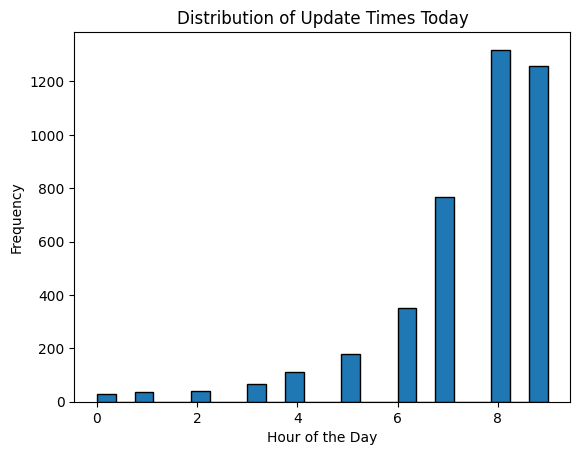

In [21]:
import matplotlib.pyplot as plt

# Plot a histogram for the update times
plt.hist(todays_data['update_hour'], bins=24, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Update Times Today')
plt.show()


In [24]:
from datetime import datetime, timedelta
import pytz

# Get the current time and make it timezone-aware
current_time = datetime.now().replace(tzinfo=pytz.UTC)

# Calculate the time 4 hours ago from now
four_hours_ago = current_time - timedelta(hours=4)

# Filter the DataFrame to get today's data
todays_data = df_analysis[df_analysis['status_timestamp'].dt.date == current_time.date()]

# Filter today's data to get statuses that are older than 4 hours
older_than_four_hours = todays_data[todays_data['status_timestamp'] <= four_hours_ago]

# Filter to get statuses that are older than 4 hours and are vacant ('Unoccupied')
older_than_four_hours_vacant = older_than_four_hours[older_than_four_hours['status_description'] == 'Unoccupied']

# Print the results
print(f"There are {len(older_than_four_hours)} statuses older than 4 hours today.")
print(f"Out of those, {len(older_than_four_hours_vacant)} are vacant.")


There are 4154 statuses older than 4 hours today.
Out of those, 1347 are vacant.


In [ ]:
# Group by hour and count the number of 'Unoccupied' statuses
vacant_by_hour = df[df['status_description'] == 'Unoccupied'].groupby('hour').size()

# Calculate the vacancy rate
vacancy_rate_by_hour = (vacant_by_hour / total_parking_spaces) * 100


In [ ]:
# Group by weekday and count the number of 'Present' statuses
occupied_by_weekday = df[df['status_description'] == 'Present'].groupby('weekday').size()

# Calculate the occupancy rate
occupancy_rate_by_weekday = (occupied_by_weekday / total_parking_spaces) * 100


In [ ]:
# Group by weekday and count the number of 'Unoccupied' statuses
vacant_by_weekday = df[df['status_description'] == 'Unoccupied'].groupby('weekday').size()

# Calculate the vacancy rate
vacancy_rate_by_weekday = (vacant_by_weekday / total_parking_spaces) * 100


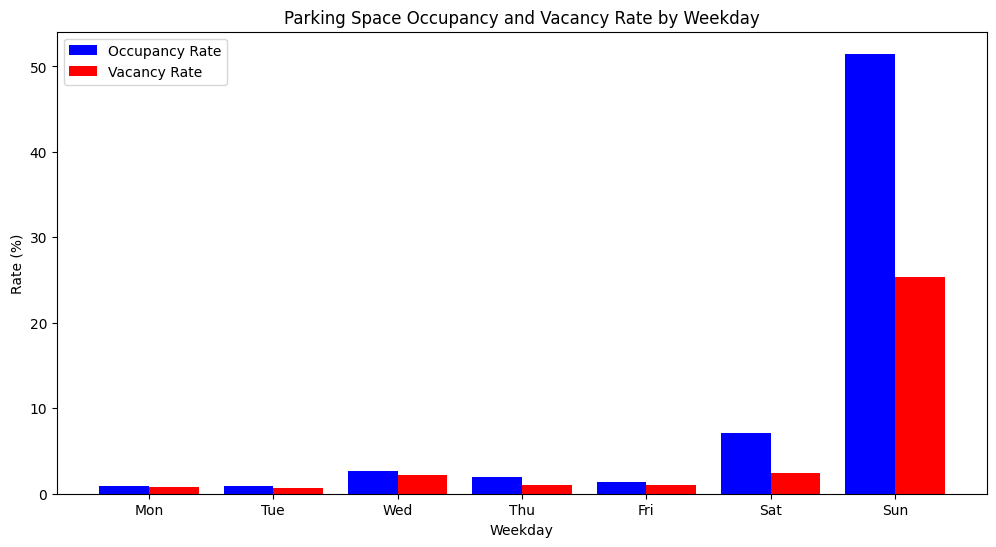

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(occupancy_rate_by_weekday.index - 0.2, occupancy_rate_by_weekday.values, width=0.4, label='Occupancy Rate', color='b')
plt.bar(vacancy_rate_by_weekday.index + 0.2, vacancy_rate_by_weekday.values, width=0.4, label='Vacancy Rate', color='r')

plt.title('Parking Space Occupancy and Vacancy Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Rate (%)')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [ ]:
# Find all duplicated rows based on all columns
duplicated_rows = parking_sensors[parking_sensors.duplicated()]

# To include the first occurrence of the duplicate in the output, you can do:
duplicated_rows_including_first = parking_sensors[parking_sensors.duplicated(keep=False)]

# Print out the duplicated rows
if duplicated_rows.empty:
    print("No exact duplicate entries found.")
else:
    print("Found exact duplicate entries:")
    print(duplicated_rows)

# Print out the duplicated rows including the first occurrence
if duplicated_rows_including_first.empty:
    print("No exact duplicate entries found including first occurrences.")
else:
    print("Found exact duplicate entries including first occurrences:")
    print(duplicated_rows_including_first)


No exact duplicate entries found.
No exact duplicate entries found including first occurrences.


In [ ]:
import pandas as pd

# Assuming parking_sensors is your DataFrame
parking_sensors = parking_sensors.sort_values(by=['parkingbay_id', 'status_timestamp'])

# Calculate time difference for each row
parking_sensors['delta'] = parking_sensors.groupby('parkingbay_id')['status_timestamp'].diff()

# Determine short-term and long-term parking based on conditions
parking_sensors['parking_type'] = 'unknown'  # Default value
mask_short_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() <= 3600)
mask_long_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() > 3600)

parking_sensors.loc[mask_short_term, 'parking_type'] = 'short-term'
parking_sensors.loc[mask_long_term, 'parking_type'] = 'long-term'

# Count the instances
short_term_count = (parking_sensors['parking_type'] == 'short-term').sum()
long_term_count = (parking_sensors['parking_type'] == 'long-term').sum()

print(f"Short-term parking instances: {short_term_count}")
print(f"Long-term parking instances: {long_term_count}")


Short-term parking instances: 202
Long-term parking instances: 8


NameError: name 'plt' is not defined

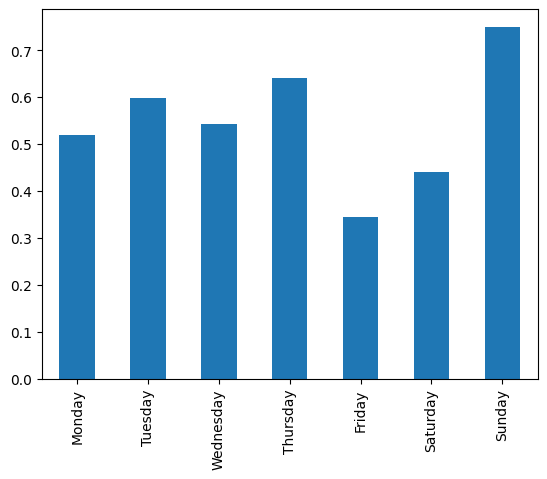

In [ ]:
# Group data by day of the week and occupancy status
daily_counts = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.dayofweek)['status_description'].value_counts().unstack().fillna(0)

# Define day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate occupancy rate for each day
daily_counts['occupancy_rate'] = daily_counts['Present'] / (daily_counts['Present'] + daily_counts['Unoccupied'])
daily_counts.index = days

# Plot the occupancy rate for each day
daily_counts['occupancy_rate'].plot(kind='bar')
plt.title('Daily Occupancy Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Occupancy Rate')
plt.show()


In [ ]:
unique_timestamps = parking_sensors['status_timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")


Number of unique timestamps: 4382


In [ ]:
sample_bay = parking_sensors[parking_sensors['parkingbay_id'] == parking_sensors['parkingbay_id'].iloc[0]]
print(sample_bay[['status_timestamp', 'status_description']])

              status_timestamp status_description
4554 2023-09-02 06:21:19+10:00         Unoccupied


In [ ]:
import numpy as np
# Calculate mean and standard deviation for the occupancy rate
mean_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].mean()
std_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].std()

# Calculate hourly occupancy rate
parking_sensors['hour'] = parking_sensors['status_timestamp'].dt.hour
hourly_occupancy = parking_sensors.groupby('hour')['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present']

# Compute the Z-scores for each hour
z_scores = (hourly_occupancy - mean_rate) / std_rate

# Detect anomalies where |Z| > 2
anomalies = z_scores[np.abs(z_scores) > 2]

print(anomalies)


Series([], Name: Present, dtype: float64)


### There seems to be only snapshot data. Try to cluster and visualize

In [ ]:
from sklearn.cluster import KMeans

# Use only occupied or unoccupied spots. Example for occupied:
occupied_spots = parking_sensors[parking_sensors['status_description'] == 'Present'][['location_lat', 'location_lon']]

kmeans = KMeans(n_clusters=5, n_init=10)  # Explicitly set n_init to 10
occupied_spots['cluster'] = kmeans.fit_predict(occupied_spots)


In [ ]:
import folium
from sklearn.cluster import KMeans

# Extract lat and lon of occupied and unoccupied parking bays
data_occupied = occupied_parking[['location_lat', 'location_lon']]
data_unoccupied = unoccupied_parking[['location_lat', 'location_lon']]

# Number of clusters
clusters = 100

# Cluster occupied parking spaces
kmeans_occupied = KMeans(n_clusters=clusters)
occupied_parking['cluster'] = kmeans_occupied.fit_predict(data_occupied)

# Cluster unoccupied parking spaces
kmeans_unoccupied = KMeans(n_clusters=clusters)
unoccupied_parking['cluster'] = kmeans_unoccupied.fit_predict(data_unoccupied)

# Create a base map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Plot occupied clusters
for cluster_num in set(occupied_parking['cluster']):
    cluster_data = occupied_parking[occupied_parking['cluster'] == cluster_num]
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    folium.Circle(
        location=center,
        radius=30,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f'Occupied Cluster {cluster_num}'
    ).add_to(m)

# Plot unoccupied clusters
for cluster_num in set(unoccupied_parking['cluster']):
    cluster_data = unoccupied_parking[unoccupied_parking['cluster'] == cluster_num]
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    folium.Circle(
        location=center,
        radius=30,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f'Unoccupied Cluster {cluster_num}'
    ).add_to(m)

m


C:\Users\asas3\.conda\envs\Python311_R361\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asas3\AppData\Local\Temp\ipykernel_23460\4141977650.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupied_parking['cluster'] = kmeans_occupied.fit_predict(data_occupied)
C:\Users\asas3\.conda\envs\Python311_R361\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, defa

### Try to extract cluster overlap as a short stop. But the time variable needs to be introduced.